<a href="https://colab.research.google.com/github/thomasmanke/ABS/blob/main/ANN_004_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification



**Goal:** Given many images and their labels, learn a neural network to predict the label of a new image (c.f human learning).

**Repetitions:**
- Define Model & Optimization Strategy
- Fit Model
- Monitor Fitting
- Evaluate Training 

**New items:**

- Data Splitting: Train & Test
- How to handle images: data structure


# Get Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print('tf-version: ', tf.__version__)

# my plot function for confusion matrix
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

tf-version:  2.9.2


## Get Data

Many famous datasets can be found here:  https://www.tensorflow.org/datasets/catalog/overview

They can be accessed easily using keras functionality.

In the following we will focus on squared images of handwritten digits. They have also been annotated (labeled).

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Test and Training Sets

For models with many parameters there is a real danger of **overfitting**, i.e. learning the specifics of one set of samples rather than generalizable rules.

For performance evaluation it is crucial to retain an independent (but representative) **test data set** that it is never used for fitting.  Using keras functionality, we loaded both training data and test data at the same time. If your data does not come split, you may have to do one of the following:

In [ ]:
%%script echo Suggestions for general (X,y). Do not run here
fract = 0.80

idx = numpy.random.permutation(X.shape[0]) # shuffle indices
s = round(X.shape[0]*fract)                # split point
train_idx, test_idx = idx[:s], idx[s:]
X_train, X_test = X[train_idx,:], X[test_idx,:]
# similar for labels

# sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = fract)

# keep in mind that the test data set should be representative
# See here for stratified partitioning
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

Suggestions for general (X,y). Do not run here


## Task (15 min): Data Inspection.

- Inspect the types and shapes of the newly defined objects: X_train, y_train, ...
- Have a look at the data (array) of the 42nd training image and describe what you see
- What is the maximal number?
- Plot the image using plt.imshow
- What is the label of this image?

In [ ]:
%%script echo edit here
...

edit here


## Data Normalization

**Alert:** Usually many more steps are involved in preparing data for analysis:
reading, reformating, filtering, shuffeling, transformation, normalization. This can take up a significant amount of time. 

Here we rely on a highly standardize data set and will only use normalization for illustration. It is important to do so consistently for both training and test data.

In [3]:
# Run this code cell only once !!!
X_train = X_train / 255.0
X_test  = X_test  / 255.0

## Flattening

A common procedure to process images is to first "flatten" them to a vector. This step will ultimately be done inside the neural network.
The line below just illustrates the behaviour for a specific image:

In [4]:
print('original:  ', X_train[42,:].shape)
print('flattened: ', X_train[42,:].flatten().shape)

original:   (28, 28)
flattened:  (784,)


## Dimensional Reduction

Scores:  (500, 2)


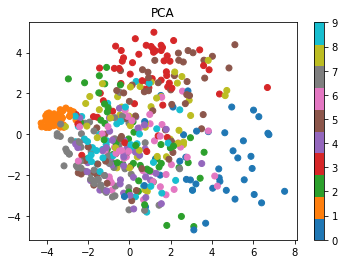

In [5]:
from sklearn.decomposition import PCA

ns = X_train.shape[0] # total number of samples
nr = 500              # random number of subsamples
idx=np.random.choice(ns, nr, replace=False)
X_sub = X_train[idx,:].reshape(nr,-1)  # flatten each of the nr images
X_pca = PCA(n_components = 2).fit_transform(X_sub)
print('Scores: ',X_pca.shape)

cm = plt.get_cmap('tab10')
plt.scatter( X_pca[:,0], X_pca[:,1] , c=y_train[idx], cmap=cm)
plt.title('PCA')
plt.colorbar()
plt.show()

## Define and Compile Neural Network Model

New Elements
- Relu Activation: Rectified Linear Unit (search for simple non-linearity)
- Adam Optimizer: don't get stuck in sharp local minima $\to$ adaptive learning rates (100k citations !)

In [6]:
nc = np.unique(y_train).size     # number of classes / labels in training set
l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'

input_shape = X_train.shape[1:]

print('X_train.shape:     ', X_train.shape)
print('input_shape:       ', input_shape)
print('number of classes: ', nc)

mod1 = tf.keras.Sequential( name = 'mnist_model_1')
mod1.add( tf.keras.layers.Flatten(input_shape=input_shape) )  # flattens input to vector 
mod1.add( tf.keras.layers.Dense(128, activation='relu',name='1st_layer') )  # add layer with 128 nodes + relu
mod1.add( tf.keras.layers.Dense(nc, activation='softmax', name='softmax_layer') )

mod1.compile(optimizer='adam', loss=l_name, metrics=a_name)

mod1.summary()

X_train.shape:      (60000, 28, 28)
input_shape:        (28, 28)
number of classes:  10
Model: "mnist_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 softmax_layer (Dense)       (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Group Tasks (40 min + 10min):

Now you are ready to go. Repeat the usual steps

- Fitting
- Tracking of fit performance (Loss, Accuracy)
- Model Evaluation: now you have test data $\ne$ training data
- Predictions: infer labels (np.argmax)
- Iterations and improvements (some ideas)
  - increase the number of epochs
  - increase the number of neurons in dense layer
  - add additional layer
  - introduce a "validation_split" during fitting. Note that this adds additional information to your history that  can be used to control for overfitting.
- Reality check: scan your own handwritten digit and submit it to your learned model. Does it work?

Summary: Report your summary and preferred solution back to the whole class

Tip: If you are on colab.research.google, you might want to activatate the "GPU hardware accelerator" under "Change runtime type"

## Fit Model

In [7]:
fh1 = mod1.fit(X_train, y_train, epochs=25, verbose=0, validation_split=0.1)

## Save Model and History

We might want to save the trained model and the metrics history for latter use.

In [8]:
model_fn   = 'minst_model.h5'   # specifying .h5 generates one h5 file (rather than a directory)
history_fn = 'minst_history.npy'

hist = fh1.history   # dictionary in fh1 object
mod1.save(model_fn)
np.save(history_fn, hist)   

## Loading Model and History

In [17]:
%%script echo Run after new start
model_fn   = 'minst_model.h5'
history_fn = 'minst_history.npy'

mod1 = tf.keras.models.load_model(model_fn)
hist = np.load(history_fn,allow_pickle=True).item()

## Evaluation

313/313 [==============================] - 1s 2ms/step - loss: 0.1202 - sparse_categorical_accuracy: 0.9775


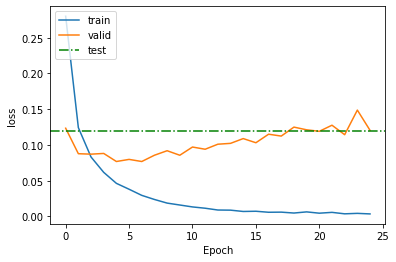

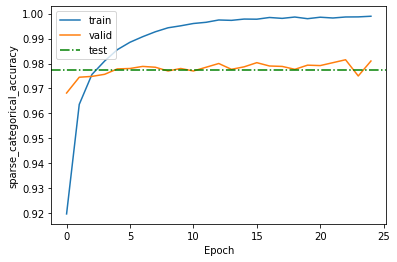

In [19]:
## Plotting history and test accuracy
def plot_fit_history(hist, name='loss', test_score=0):
  """Plots history of metrics 'name'
  The validation metrics will also be plotted if available as 'val_name' (Keras convention)
  A test_score can be added to compare the evolution"""

  if name not in hist:
      print('plot_fit_history: {} is not a key in history !'.format(name))
      return
  val_name = 'val_' + name
  plt.plot(hist[name],     label='train')

  if val_name in hist:
    # add validation if in data
    plt.plot(hist[val_name], label='valid')
  
  plt.axhline(y=test_score, color='green', linestyle='-.',label = 'test')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend(loc='upper left')
  plt.show()

test_loss, test_acc = mod1.evaluate(X_test, y_test)

a_name='sparse_categorical_accuracy'
plot_fit_history(hist, 'loss', test_loss)
plot_fit_history(hist, a_name, test_acc)

313/313 [==============================] - 1s 2ms/step


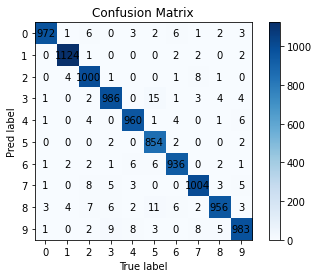

In [20]:
mod1_pred = mod1.predict(X_test)           # probabilities    
y_pred    = np.argmax(mod1_pred, axis=1)   # classes with max prob (= labels)
cm=confusion_matrix(y_pred, y_test)
plot_cm(cm)

## Load own image

In [ ]:
fn='figures/ANN_Digit3.jpg'  # point to proper path
input_size=X_train.shape[1:]  

### Using keras

In [ ]:
#%%script echo Make sure to set the proper image size (to match the model)
from tensorflow.keras.preprocessing import image

# load image 
# adjust to desired input_size (x,y) and convert RGB to grayscale (as MINST data)
img = image.load_img(fn, target_size=input_size, color_mode="grayscale")
print('filename: ', fn, type(img), input_size)

# convert PIL to numpy and reverse 0<->255 (--> MNIST convention)
img = 255 - np.array(img)    # alternative: image.img_to_array(img)
print('type, shape: ', type(img), img.shape)

img = img / 255.  # Normalization (in line with MINST)

plt.imshow(img, cmap='Greys')
print('img.shape:', img.shape)

### Using plt and cv2

In [ ]:
import cv2
img = plt.imread(fn)                                             # read
img = cv2.resize(img, input_size, interpolation=cv2.INTER_AREA)  # resize

img = np.mean(img,axis=2)   # RGB averaging
img = 255 - img             # MINST convention
img = img / 255             # Normalization

plt.imshow(img, cmap='Greys')
print('img.shape:', img.shape)

## Prediction

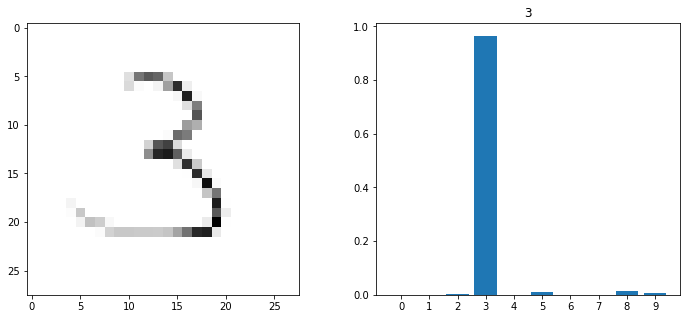

In [ ]:
# remember to reshape single image to network expectation = set of images
img = img[np.newaxis, ...]
pred=mod1.predict(img)

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(img[0], cmap='Greys')
ax[1].bar(range(10), pred[0])
ax[1].set_xticks(range(10))
ax[1].set_title(np.argmax(pred))
plt.show()